### Load packages

In [190]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

## Load data

In [105]:
df = pd.read_csv("credit_risk_dataset.csv")

## Variable names and descriptions

- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
  - A: The borrower has a high creditworthiness, indicating low risk.
  - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
  - C: The borrower's creditworthiness is moderate.
  - D: The borrower is considered to have higher risk compared to previous grades.
  - E: The borrower's creditworthiness is lower, indicating a higher risk.
  - F: The borrower poses a significant credit risk.
  - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
  - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
  - Y: The individual has a history of defaults on their credit file.
  - N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

## Basic data information

In [106]:
df.shape

(32581, 12)

In [107]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [109]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [110]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [111]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Data exploration

### Numerical variables

In [112]:
n_vars = [x for x in df.columns.to_list() if df[x].dtype == "int64" or df[x].dtype == "float64"]

#### Box plot

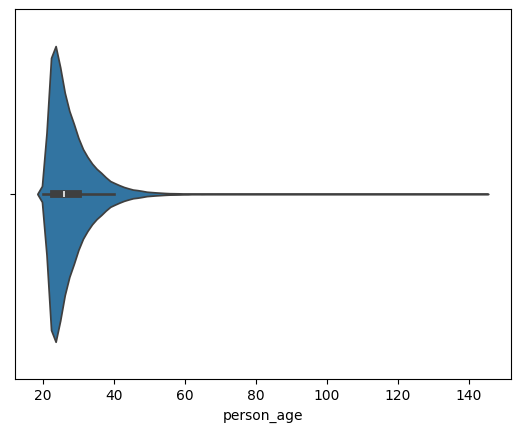

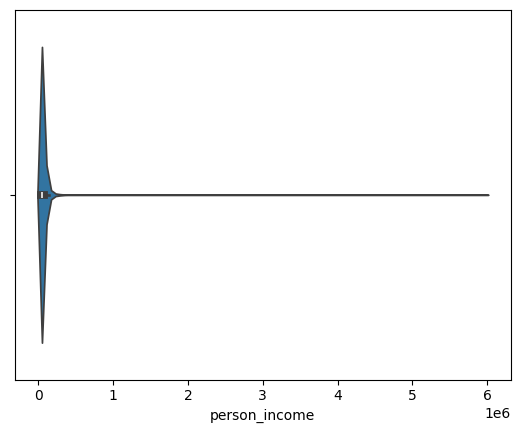

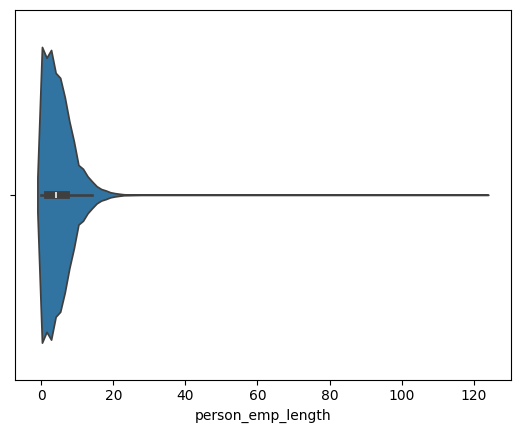

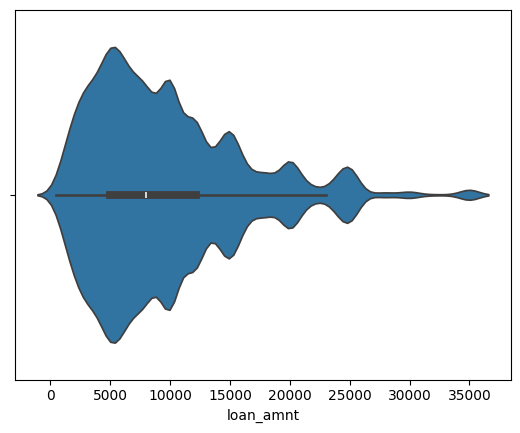

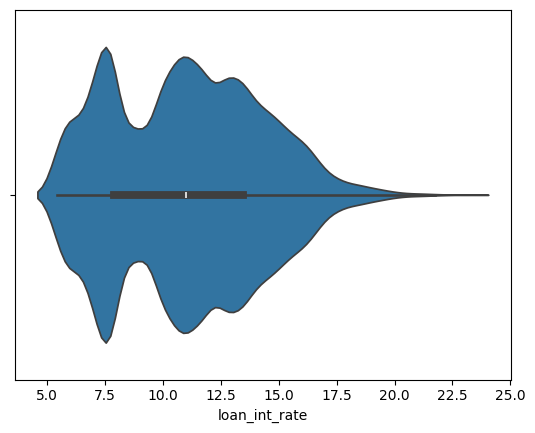

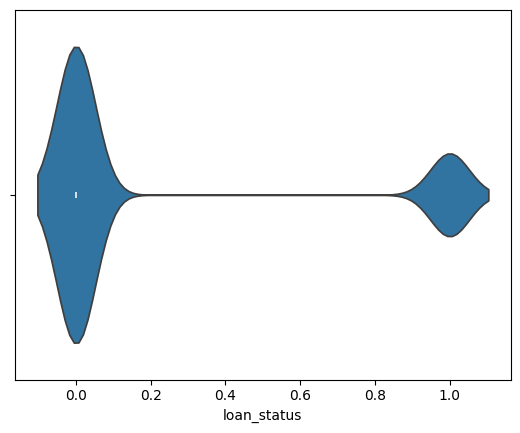

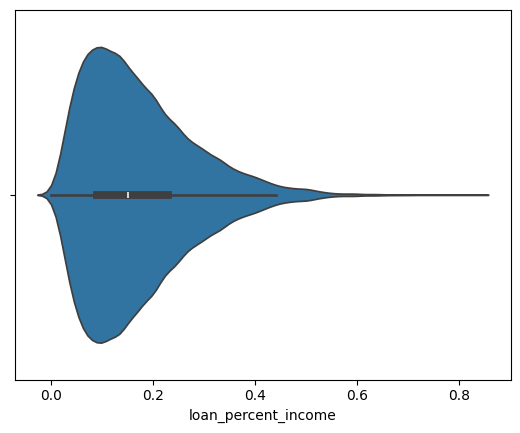

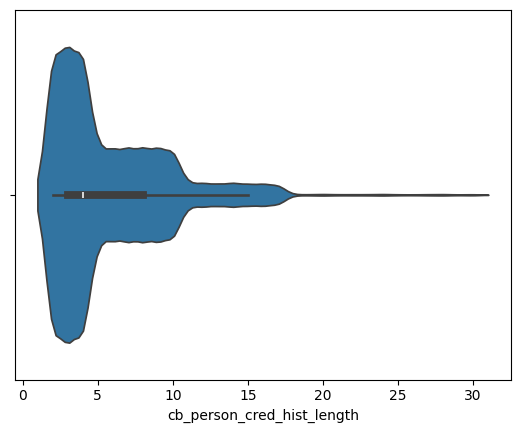

In [113]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.violinplot(df, x = col, ax = ax)

#### hist plot

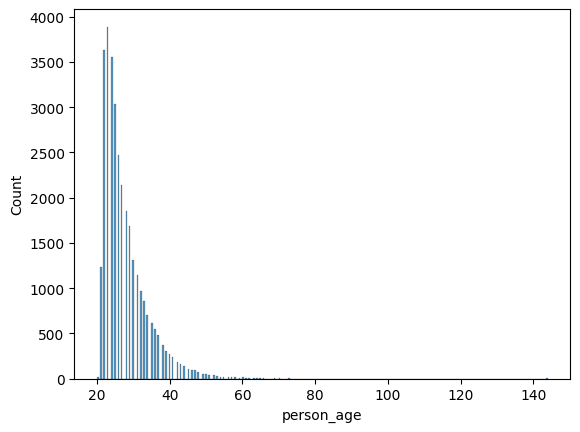

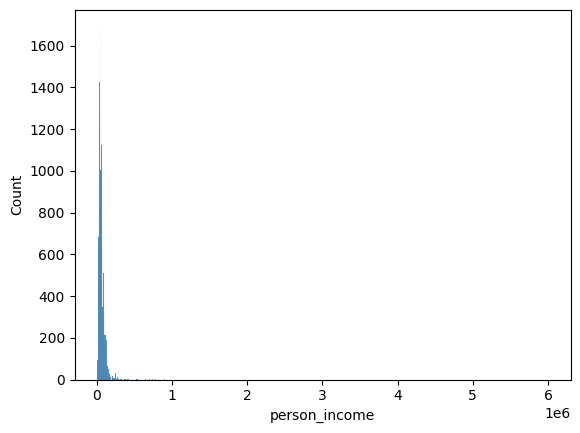

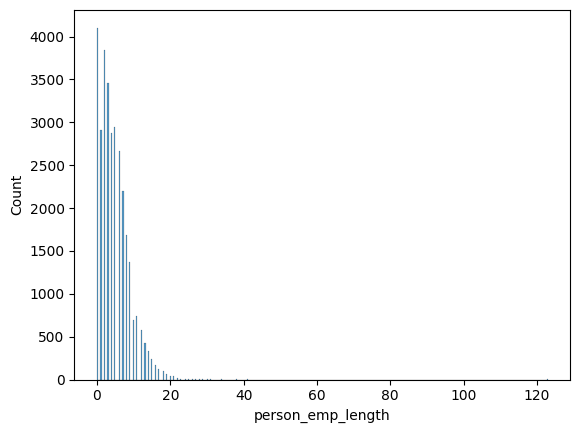

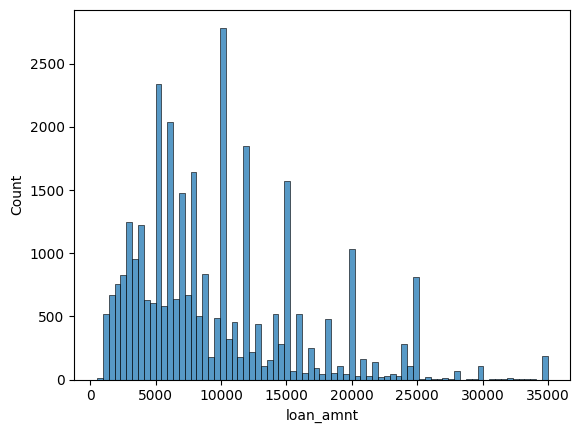

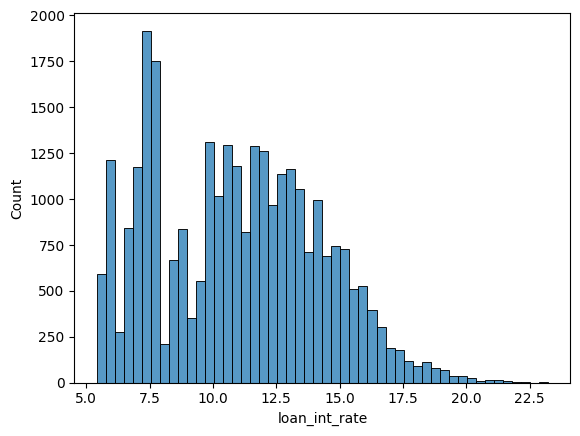

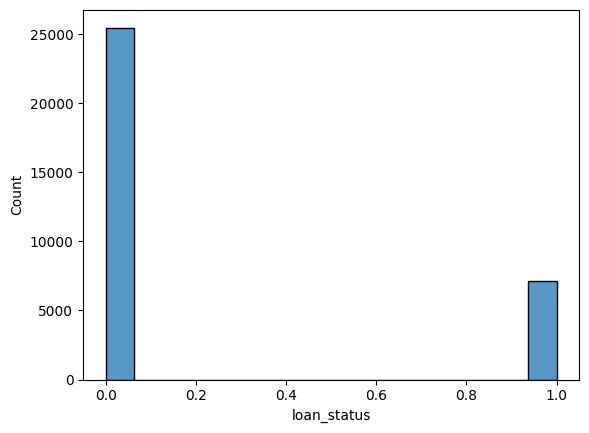

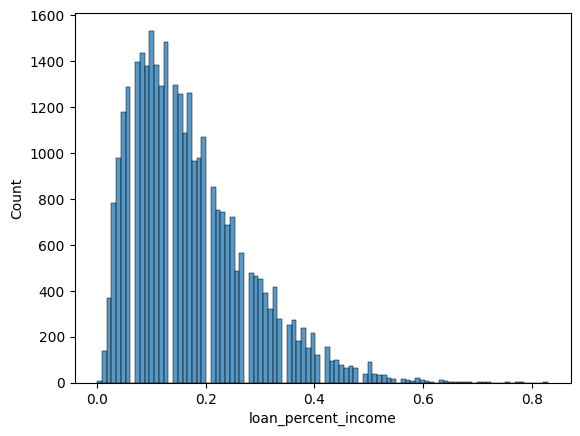

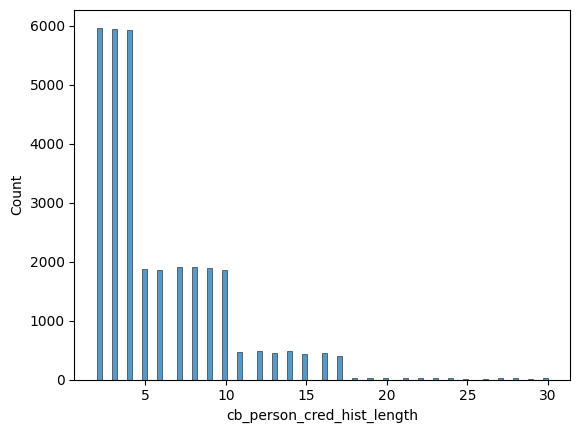

In [114]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.histplot(df, x = col, ax =ax)

#### loan_percent_income

718 31863


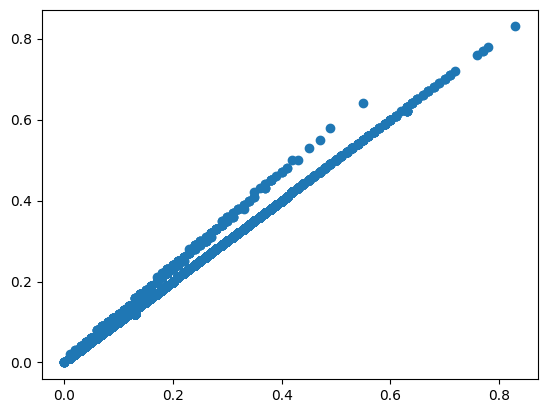

In [115]:
#We have loan_amount and person_income. Lets reconstruct the loan_percent_income variable to check for accuracy

df["loan_percent_income_new"] = df["loan_amnt"]/df["person_income"]

#it appears if they rounded ip, so lets do the same to compare
df["loan_percent_income_new"] = df["loan_percent_income_new"].apply(lambda x: round(x, 2))

plt.scatter(df["loan_percent_income"], df["loan_percent_income_new"])

#The majority of cases are equal but some are not. We cannot comfirm if this is intnetional or not.
#Lets overwrite the column with the recomputed values as we cannot comfirm with experts. 
print(len(df[df["loan_percent_income_new"]!=df["loan_percent_income"]]), len(df[df["loan_percent_income_new"]==df["loan_percent_income"]]))

df["loan_percent_income"] = df["loan_percent_income_new"]  

### Categorical variables

In [116]:
c_vars = [x for x in df.columns.to_list() if df[x].dtype == "object"]

#### Countplot

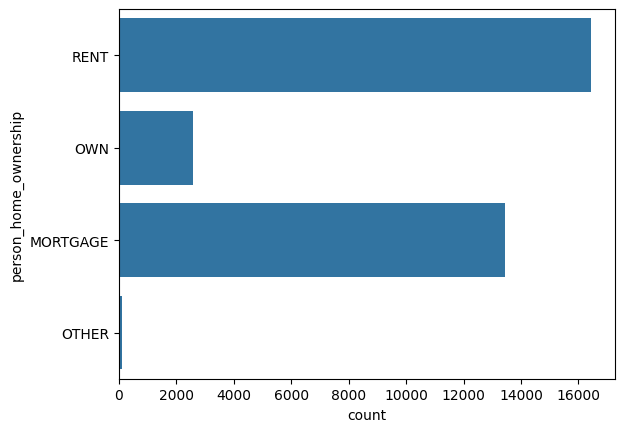

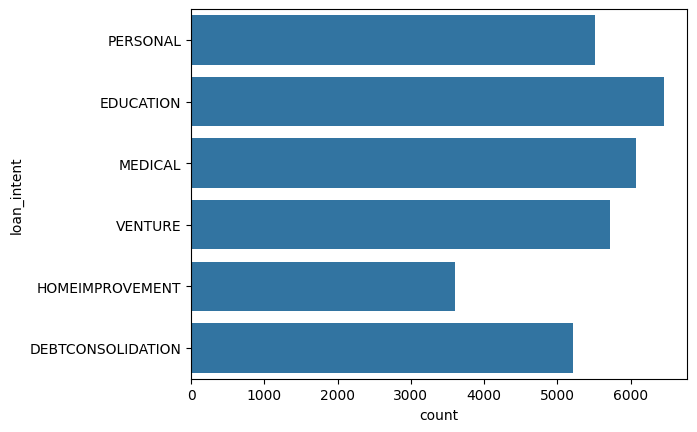

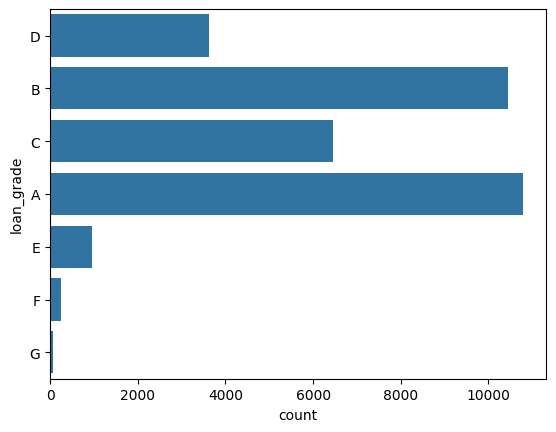

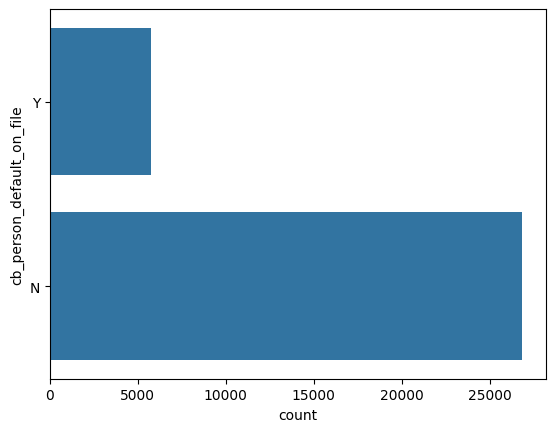

In [117]:
for col in c_vars:
    fig, ax = plt.subplots()
    sns.countplot(df[col], ax = ax)

## Data treatment

In [118]:
df_clean = df.copy()

### person_age

In [119]:
df_clean[df_clean["person_age"]>80]

#Clearly there are some incorrect fields here with person age > 100 years. We will remove these rows
#Note, for IRB modelling, this would require more investigation as one cannot simply remove data without
#strong justification

df_clean = df_clean[df_clean["person_age"]<100]

### person_emp_length

In [120]:
df_clean[df_clean["person_emp_length"]>df_clean["person_age"]]

#We notice there are some invalid values for age/employment length. We will remove these rows.
#We remove cases where emp_length is greater than person_age

#we need to be careful how we do it, because person_emp_length contains missing values and we 
#dont want to lose the rows with missing values for person_emp_length
df_clean = df_clean[(df_clean["person_emp_length"].isnull()) | 
                    (df_clean["person_emp_length"] < df_clean["person_age"])]

### cb_person_cred_hist_length

In [121]:
df_clean[df_clean["cb_person_cred_hist_length"]>df_clean["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_new


In [122]:
df_clean[df_clean["cb_person_cred_hist_length"]>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_new


### person_income

In [123]:
#from histogram, we see person_income has some large values. Lets investigate further.
df_clean[df_clean["person_income"]>1000000]

#We have some largue annual incomes greater than 1m, with a small loan amount. This
#is unlikely. We would need to comfirm this with stakeholders to check the reliability 
#of this information but we can't. Therefore, I will assume they are correct.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_new
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8,0.01
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,N,11,0.01
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,N,16,0.01
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15,0.00
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17,0.00
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15,0.00
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30,0.01
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21,0.00


### missing values

In [124]:
df_clean.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_percent_income_new          0
dtype: int64

In [125]:
#Starting with person_emp_length
df_clean[df_clean["person_emp_length"].isnull()].head()

#Missing values appear valid and therefore require treatment. We must choose imputation method
#carefully since if we choose the median, we may have cases where the person_age is greater median person_emp_length

#Lets try median based on buckets of person_age for a more accurate imputation
df_clean["person_age_bucket"] = pd.cut(df_clean["person_age"], bins = [0, 30, 40, 50, 60, 70, 100])

#Number of observations per bucket to see if appropriate for computing median
print(df_clean["person_age_bucket"].value_counts())

#better to merge bucket 60-70 with 70-100 based on number of observations
df_clean["person_age_bucket"] = pd.cut(df_clean["person_age"], bins = [0, 30, 40, 50, 60, 100])

median_values = df_clean.groupby("person_age_bucket")["person_emp_length"].median()

print(median_values)

#compare with median of entire column
print(df_clean["person_emp_length"].median())

#It turns out both methods lead to the same result (apart from final bucket). The median will always be less than person_age as min age is 20.
#Therefore, we can impute missing values with median of entire column, but it is good we checked.
df_clean["person_emp_length"] = df_clean["person_emp_length"].fillna(df_clean["person_emp_length"].median())

person_age_bucket
(0, 30]      24822
(30, 40]      6263
(40, 50]      1206
(50, 60]       218
(60, 70]        57
(70, 100]        8
Name: count, dtype: int64
person_age_bucket
(0, 30]      4.0
(30, 40]     4.0
(40, 50]     4.0
(50, 60]     4.0
(60, 100]    3.0
Name: person_emp_length, dtype: float64
4.0


/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_21838/1850783786.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df_clean.groupby("person_age_bucket")["person_emp_length"].median()


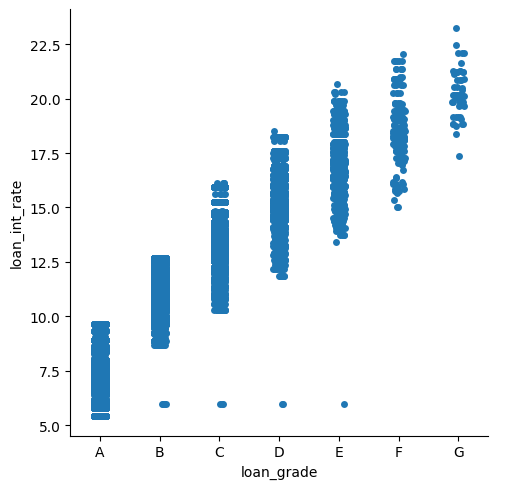

In [126]:
#Now for loan_int_rate
df_clean[df_clean["loan_int_rate"].isnull()].head()

#Missings seem valued and we need to impute.
#Lets see if there is a relationship between loan_grade and loan_int_rate
sns.catplot(data=df_clean, x = "loan_grade", y="loan_int_rate", order = ["A", "B", "C", "D", "E", "F", "G"])

#clearly from plot, each loan grade has a range of interest rates. We can impute missing values based on median of loan_grade.
median_values = df_clean.groupby("loan_grade")["loan_int_rate"].median()

df_clean["loan_int_rate"] = df_clean.apply(
    lambda row: median_values[row["loan_grade"]] if pd.isnull(row["loan_int_rate"]) else row["loan_int_rate"], 
    axis=1
)

## Risk driver construction

In [209]:
df_model = df_clean.copy()

### Categorical drivers

In [210]:
#For each categorical variable, lets make a dummy variable for each category
df_model = pd.get_dummies(df_model, columns = c_vars, dtype=float)

### Numeric drivers

In [211]:
#Lets try a bucket transformation for numerical variables that make sense to be in buckets

bucket_cols = [
    "person_income",
    "loan_amnt",
    "loan_percent_income"
]

for col in bucket_cols:
    df_model[col + "_bucket"] = pd.cut(df_model[col], bins = 10)
    #check size of bucket columns
    print(df_model[col + "_bucket"].value_counts())


person_income_bucket
(1964.216, 207578.4]      32166
(207578.4, 411156.8]        334
(411156.8, 614735.2]         40
(614735.2, 818313.6]         18
(818313.6, 1021892.0]         8
(1021892.0, 1225470.4]        3
(1836205.6, 2039784.0]        2
(1225470.4, 1429048.8]        1
(1429048.8, 1632627.2]        1
(1632627.2, 1836205.6]        1
Name: count, dtype: int64
loan_amnt_bucket
(3950.0, 7400.0]      9456
(7400.0, 10850.0]     7361
(465.5, 3950.0]       5123
(10850.0, 14300.0]    3912
(14300.0, 17750.0]    2863
(17750.0, 21200.0]    1925
(24650.0, 28100.0]     925
(21200.0, 24650.0]     672
(31550.0, 35000.0]     212
(28100.0, 31550.0]     125
Name: count, dtype: int64
loan_percent_income_bucket
(0.083, 0.166]       10705
(-0.00083, 0.083]     7534
(0.166, 0.249]        7293
(0.249, 0.332]        4311
(0.332, 0.415]        1712
(0.415, 0.498]         679
(0.498, 0.581]         259
(0.581, 0.664]          60
(0.664, 0.747]          16
(0.747, 0.83]            5
Name: count, dtype: int

In [ ]:
#Clearly we need to make a restriction for the mimunum number of observations per bucket

def create_bins(df, column, desired_bins, min_size):
    """
    Create quantile-based bins for a numerical column in a DataFrame while ensuring 
    each bin has at least `min_size` observations. If a bin has fewer than `min_size` 
    observations, it merges with the adjacent bin. The first bin always starts from 0.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    column : str
        The name of the numerical column to bin.
    desired_bins : int
        The desired number of bins to create.
    min_size : int
        The minimum number of observations required in each bin.

    Returns
    -------
    pd.DataFrame
        A DataFrame with a new column `<column>_bucket` representing the bins.
    """
    
    # Step 1: Create the initial quantile-based bins using pd.qcut
    df[f'{column}_bucket'] = pd.qcut(df[column], q=desired_bins, duplicates='drop')
    
    # Step 2: Force the first bin to start at 0
    bin_edges = df[f'{column}_bucket'].cat.categories
    # We need to adjust the first left boundary to 0 (using the first right boundary as the boundary)
    new_edges = [(0, bin_edges[0].right)] + [(bin_edges[i].left, bin_edges[i].right) for i in range(1, len(bin_edges))]
    
    # Step 3: Create the new bins using Interval objects
    new_bins = [pd.Interval(left, right, closed='right') for left, right in new_edges]

    # Step 4: Apply the adjusted bins
    df[f'{column}_bucket'] = pd.cut(df[column], bins=new_bins, include_lowest=True)

    # Step 5: Merge bins if count is below min_size
    bin_counts = df[f'{column}_bucket'].value_counts().sort_index()

    while any(bin_counts < min_size):
        small_bin = bin_counts[bin_counts < min_size].index[0]
        idx = list(bin_counts.index).index(small_bin)

        # Merge bins
        if idx > 0:
            # Merge with the previous bin
            new_bin = pd.Interval(
                left=bin_counts.index[idx-1].left, 
                right=bin_counts.index[idx].right, 
                closed='right'
            )
            # Remove the current small bin and update the list
            new_bins[idx-1] = new_bin
            del new_bins[idx]
        else:
            # Merge with the next bin
            new_bin = pd.Interval(
                left=bin_counts.index[idx].left, 
                right=bin_counts.index[idx+1].right, 
                closed='right'
            )
            # Remove the next bin and update the list
            new_bins[idx] = new_bin
            del new_bins[idx+1]

        # Reapply the updated bins to the DataFrame
        df[f'{column}_bucket'] = pd.cut(df[column], bins=new_bins, include_lowest=True)

        # Recalculate counts after merging
        bin_counts = df[f'{column}_bucket'].value_counts().sort_index()

    return df

#Lets try 100
for col in bucket_cols:
    df_model = create_bins(df_model, col, 10, 100)
    #check size of bucket columns
    print(df_model[col + "_bucket"].value_counts())


person_income_bucket
(35000.0, 42000.0]       3532
(28585.8, 35000.0]       3372
(73000.0, 86000.0]       3259
(0.0, 28585.8]           3258
(63000.0, 73000.0]       3254
(110004.0, 2039784.0]    3253
(86000.0, 110004.0]      3236
(49000.0, 55000.0]       3207
(55000.0, 63000.0]       3189
(42000.0, 49000.0]       3014
Name: count, dtype: int64
loan_amnt_bucket
(8000.0, 10000.0]     4724
(0.0, 3000.0]         3982
(6750.0, 8000.0]      3769
(5400.0, 6750.0]      3254
(19000.0, 35000.0]    3251
(14500.0, 19000.0]    3238
(4400.0, 5400.0]      3236
(10000.0, 12000.0]    2882
(3000.0, 4400.0]      2561
(12000.0, 14500.0]    1677
Name: count, dtype: int64
loan_percent_income_bucket
(0.05, 0.08]    4096
(0.12, 0.15]    3747
(0.0, 0.05]     3430
(0.15, 0.18]    3307
(0.25, 0.32]    3160
(0.32, 0.83]    3155
(0.1, 0.12]     2950
(0.08, 0.1]     2920
(0.21, 0.25]    2914
(0.18, 0.21]    2887
Name: count, dtype: int64


In [218]:
df_model

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_percent_income_new,person_age_bucket,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_income_bucket,loan_amnt_bucket,loan_percent_income_bucket
1,21,9600,5.0,1000,11.14,0,0.10,2,0.10,"(0, 30]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0.0, 28585.8]","(0.0, 3000.0]","(0.08, 0.1]"
2,25,9600,1.0,5500,12.87,1,0.57,3,0.57,"(0, 30]",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0.0, 28585.8]","(5400.0, 6750.0]","(0.32, 0.83]"
3,23,65500,4.0,35000,15.23,1,0.53,2,0.53,"(0, 30]",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"(63000.0, 73000.0]","(19000.0, 35000.0]","(0.32, 0.83]"
4,24,54400,8.0,35000,14.27,1,0.64,4,0.64,"(0, 30]",...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"(49000.0, 55000.0]","(19000.0, 35000.0]","(0.32, 0.83]"
5,21,9900,2.0,2500,7.14,1,0.25,2,0.25,"(0, 30]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0.0, 28585.8]","(0.0, 3000.0]","(0.21, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,0.11,"(50, 60]",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"(49000.0, 55000.0]","(5400.0, 6750.0]","(0.1, 0.12]"
32577,54,120000,4.0,17625,7.49,0,0.15,19,0.15,"(50, 60]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(110004.0, 2039784.0]","(14500.0, 19000.0]","(0.12, 0.15]"
32578,65,76000,3.0,35000,10.99,1,0.46,28,0.46,"(60, 100]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(73000.0, 86000.0]","(19000.0, 35000.0]","(0.32, 0.83]"
32579,56,150000,5.0,15000,11.48,0,0.10,26,0.10,"(50, 60]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(110004.0, 2039784.0]","(14500.0, 19000.0]","(0.08, 0.1]"


## Model development

### Train / Test split

In [205]:
#We need a split of 80/20, but we want to ensure it is balanced based on the target variable "loan_status"

#We can do this with a function, which searches for train and test splits that are balanced

def train_test_split_balanced(df, target_col, diff_threshold=0.01, test_size=0.2, random_state=None):
    """
    Split the DataFrame into train and test sets while ensuring that the difference in the mean of the target variable
    between the train and test sets is below a given threshold. The split is performed repeatedly if the difference 
    exceeds the threshold, using different random states.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to split.
    target_col : str
        The name of the target column to balance.
    diff_threshold : float, optional, default=0.01
        The maximum allowed absolute difference in the mean of the target column between the train and test sets.
    test_size : float, optional, default=0.2
        The proportion of the data to include in the test set (between 0.0 and 1.0).
    random_state : int, optional, default=None
        The seed used by the random number generator for reproducibility. If None, a random seed will be chosen.

    Returns
    -------
    train : pandas.DataFrame
        The training set with balanced target variable distribution.
    test : pandas.DataFrame
        The test set with balanced target variable distribution.
    """
    
    # If no random_state is provided, generate one
    if random_state is None:
        random_state = random.randint(1, 10000000)

    # Step 1: Make a train, test split based on the random seed
    train, test = train_test_split(df, test_size=test_size, random_state=random_state)

    # Step 2: Compute the average of the target column for train and test sets
    train_target = train[target_col].mean()
    test_target = test[target_col].mean()

    # Step 3: Check if the absolute difference in target means is within the acceptable threshold
    while abs(train_target - test_target) > diff_threshold:
        print(f"Random state {random_state} has abs difference of {abs(train_target - test_target):.4f}", " which is greater than threshold of ", diff_threshold, ". Searching for new random state.")  
        # Generate a new random state if the difference exceeds the threshold
        random_state = random.randint(1, 10000000)
        train, test = train_test_split(df, test_size=test_size, random_state=random_state)
        train_target = train[target_col].mean()
        test_target = test[target_col].mean()

    print(f"Random state {random_state} has abs difference of {abs(train_target - test_target):.4f}. Search complete.")

    return train, test

train, test = train_test_split_balanced(df_model, "loan_status", diff_threshold = 0.001, test_size = 0.2, random_state = None)
    

Random state 7593557 has abs difference of 0.0097  which is greater than threshold of  0.001 . Searching for new random state.
Random state 4799778 has abs difference of 0.0041  which is greater than threshold of  0.001 . Searching for new random state.
Random state 4714953 has abs difference of 0.0085  which is greater than threshold of  0.001 . Searching for new random state.
Random state 3154020 has abs difference of 0.0078  which is greater than threshold of  0.001 . Searching for new random state.
Random state 1667332 has abs difference of 0.0003. Search complete.


In [ ]:
riskdriver_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'loan_percent_income_new',
    'person_age_bucket',
    'person_home_ownership_MORTGAGE',
    'person_home_ownership_OTHER',
    'person_home_ownership_OWN',
    'person_home_ownership_RENT',
    'loan_intent_DEBTCONSOLIDATION',
    'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_VENTURE',
    'loan_grade_A',
    'loan_grade_B',
    'loan_grade_C',
    'loan_grade_D',
    'loan_grade_E',
    'loan_grade_F',
    'loan_grade_G',
    'cb_person_default_on_file_N',
    'cb_person_default_on_file_Y',
    'person_income_bucket',
    'loan_amnt_bucket',
    'loan_percent_income_bucket']   

target_column = ["loan_status"]

Random state 9165200 has abs difference of 0.0085  which is greater than threshold of  0.001 . Searching for new random state.
Random state 8184469 has abs difference of 0.0012  which is greater than threshold of  0.001 . Searching for new random state.
Random state 4199081 has abs difference of 0.0005. Search complete.
